In [1]:
import scipy.sparse
import scipy.linalg
import numpy as np
import mkprop
from exlaser import doublewellproblem as prob
import matplotlib.pyplot as plt

n=1200
L=5
Hamiltonian = prob(n,L)

x, nrm, inr = Hamiltonian.getprop()
#tend = 5.0
tnow = 0
tend = 0.6
u = Hamiltonian.getinitialstate()

mv, dmv = Hamiltonian.setupHamiltonian(0)

In [2]:
np.set_printoptions(linewidth=180)
m=60
tol=1e-8
ktype=2
reo=0

In [3]:
dtinit = 5e-2
yCFM4a1,tlist1,dtlist1,_,mc11,mc12,mc13 = mkprop.adaptiveCFMp4j2(u,tnow,tend,dtinit,Hamiltonian,tol=tol,ktype=ktype,reo=reo,inr=inr)

In [4]:
dtinit = 5e-2
yCFM4a2,tlist2,dtlist2,_,mc21,mc22,mc23 = mkprop.adaptiveCFMp4j3(u,tnow,tend,dtinit,Hamiltonian,tol=tol,ktype=ktype,reo=reo,inr=inr)

In [5]:
dtinit = 5e-2
yCFM4BBK,tlist3,dtlist3,_,mc31,mc32,mc33 = mkprop.adaptiveCFMBBK4(u,tnow,tend,dtinit,Hamiltonian,tol=tol,ktype=ktype,reo=reo,inr=inr)

In [6]:
dtinit = 1e-3
ympa1,tlist4,dtlist4,_,mc41,mc42,mc43 = mkprop.adaptivemidpoint(u,tnow,tend,dtinit,Hamiltonian,tol=tol,ktype=ktype,reo=reo,inr=inr)

In [7]:
print(nrm(yCFM4a1-yCFM4a2)/tend)
print(nrm(yCFM4BBK-yCFM4a2)/tend)
print(nrm(ympa1-yCFM4a2)/tend)

1.1533203118983076e-09
1.852651915173737e-09
2.904032815783959e-09


In [8]:
print(sum(mc11),sum(mc21),sum(mc31),sum(mc41))
print(sum(mc12),sum(mc22),sum(mc32),sum(mc42))
print(sum(mc13),sum(mc23),sum(mc33),sum(mc43))

36764 35401 35730 130813
5313 16518 21135 222
30078 30956 31730 29394


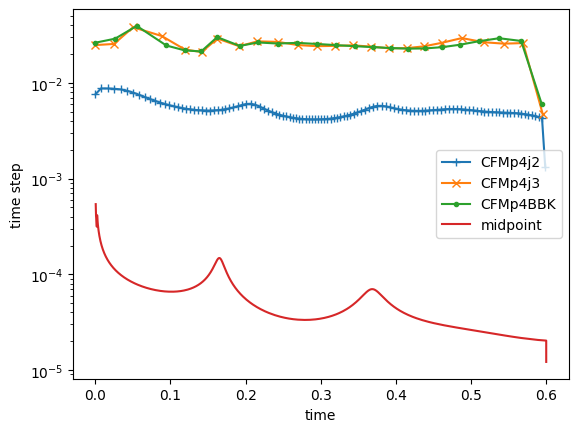

In [12]:
# time steps dt over time
plt.semilogy(tlist1,dtlist1,'+-',tlist2,dtlist2,'x-',tlist3,dtlist3,'.-',tlist4,dtlist4);
plt.ylabel('time step')
plt.xlabel('time')
plt.gca().legend(('CFMp4j2','CFMp4j3','CFMp4BBK','midpoint'), loc='center right')
#plt.savefig("stepsize.pdf", format="pdf", bbox_inches="tight")
plt.savefig("stepsize.png")

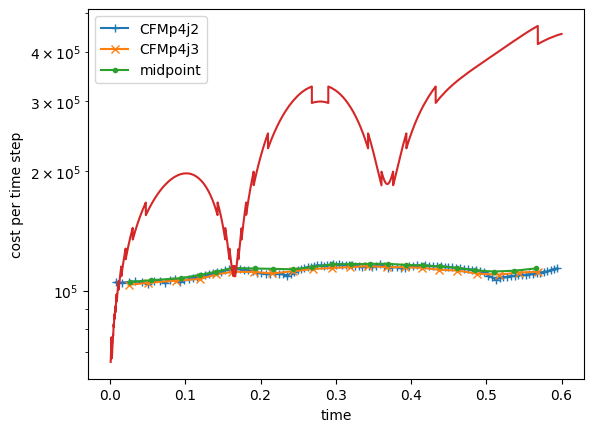

In [10]:
# number of matrix-vector multiplications used per time step over time (only for steps which were accepted)
eff1 = [(m1+m3)/dt for (m1,m2,m3,dt) in zip(mc11,mc12,mc13,dtlist1)]
eff2 = [(m1+m3)/dt for (m1,m2,m3,dt) in zip(mc21,mc22,mc23,dtlist2)]
eff3 = [(m1+m3)/dt for (m1,m2,m3,dt) in zip(mc31,mc32,mc33,dtlist3)]
eff4 = [(m1+m3)/dt for (m1,m2,m3,dt) in zip(mc41,mc42,mc43,dtlist4)]
plt.semilogy(tlist1[1:-1],eff1[1:-1],'+-',tlist2[1:-1],eff2[1:-1],'x-',
             tlist3[1:-1],eff3[1:-1],'.-',tlist4[1:-1],eff4[1:-1]);
plt.ylabel('cost per time step')
plt.xlabel('time')
plt.gca().legend(('CFMp4j2','CFMp4j3','midpoint'))
#plt.title('cost per time step over time');
#plt.savefig("costperstepsize.pdf", format="pdf", bbox_inches="tight")
plt.savefig("costperstepsize.png")